<a href="https://colab.research.google.com/github/mtfaye/data-analyst-challenge/blob/master/Mistplay_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Mistplay - Data Analyst Challenge**


In [0]:
import json
import pandas as pd 
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1 - Plot difference in ltv, ttime, and tue**

In [0]:
# Load takeHome.csv
df = pd.read_csv('/content/drive/My Drive/Data analyst challenge/takeHome.csv')

In [4]:
df

,ltv,ttime,abt,tue
0,"{""n"":""250""}","{""n"":""1077572""}","{""n"":""31""}","{""n"":""38""}"
1,"{""n"":""49""}","{""n"":""60028""}","{""n"":""32""}","{""n"":""15""}"
2,"{""n"":""680""}","{""n"":""2018285""}","{""n"":""7""}","{""n"":""46""}"
3,"{""n"":""125""}","{""n"":""98142""}","{""n"":""11""}","{""n"":""15""}"
4,"{""n"":""450""}","{""n"":""115692""}","{""n"":""9""}","{""n"":""15""}"
...,...,...,...,...
9994,"{""n"":""250""}","{""n"":""4002074""}","{""n"":""23""}","{""n"":""127""}"
9995,"{""n"":""250""}","{""n"":""2134787""}","{""n"":""28""}","{""n"":""53""}"
9996,"{""n"":""150""}","{""n"":""107426""}","{""n"":""53""}","{""n"":""15""}"
9997,"{""n"":""72""}","{""n"":""0""}","{""n"":""26""}","{""n"":""15""}"


In [5]:
# Remove characters
df = df.replace(['{', '"', ':', 'n', '}'], ' ', regex=True)
df

,ltv,ttime,abt,tue
0,250,1077572,31,38
1,49,60028,32,15
2,680,2018285,7,46
3,125,98142,11,15
4,450,115692,9,15
...,...,...,...,...
9994,250,4002074,23,127
9995,250,2134787,28,53
9996,150,107426,53,15
9997,72,0,26,15


In [6]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
ltv      9998 non-null object
ttime    9999 non-null object
abt      9999 non-null object
tue      9997 non-null object
dtypes: object(4)
memory usage: 312.6+ KB


In [7]:
# Column ltv and tue have missing values
# Drop rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9998
Data columns (total 4 columns):
ltv      9996 non-null object
ttime    9996 non-null object
abt      9996 non-null object
tue      9996 non-null object
dtypes: object(4)
memory usage: 390.5+ KB


In [8]:
# Convert data types from string to float 
df = df.astype({'ltv': float ,'ttime': float, 'abt': float, 'tue':float})
df.dtypes

ltv      float64
ttime    float64
abt      float64
tue      float64
dtype: object

In [9]:
# Some stats overview
df.describe() 

,ltv,ttime,abt,tue
count,9996.000000,9.996000e+03,9996.000000,9996.000000
mean,388.548219,1.455021e+07,30.284314,193.528311
std,417.700380,6.361143e+07,17.402454,551.032452
min,0.000000,0.000000e+00,1.000000,15.000000
25%,200.000000,1.148820e+05,15.000000,15.000000
50%,250.000000,8.482985e+05,30.000000,33.000000
75%,450.000000,4.450682e+06,45.000000,118.250000
max,8481.000000,1.735807e+09,60.000000,10563.000000


In [10]:
# Verify correlation between attributes
df.corr().style.format("{:.2}").background_gradient\
(cmap=plt.get_cmap('coolwarm'), axis=1)

,ltv,ttime,abt,tue
ltv,1.0,0.43,-0.0065,0.58
ttime,0.43,1.0,-0.017,0.81
abt,-0.0065,-0.017,1.0,-0.035
tue,0.58,0.81,-0.035,1.0


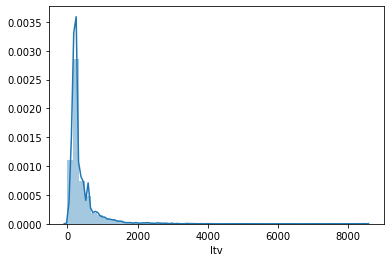

In [11]:
sns.distplot(df.ltv)

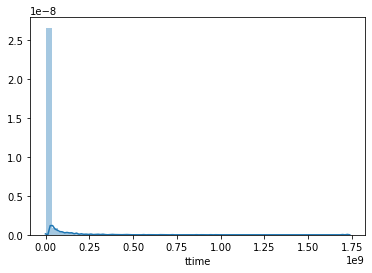

In [12]:
sns.distplot(df.ttime)

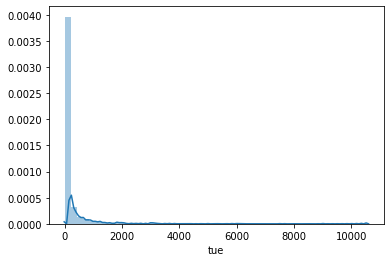

In [13]:
sns.distplot(df.tue)

### **2 - Identify fraudulent patterns**

In [0]:
# Load sts.csv
df_2 = pd.read_csv('/content/drive/My Drive/Data analyst challenge/sts.csv')

In [15]:
df_2 

,state,sts
0,"{""n"":""1""}","{""m"":{""com.utorrent.client.pro"":{""m"":{""d30"":{""..."
1,"{""n"":""1""}","{""m"":{""com.tetherstudios.solitaire.klondike"":{..."
2,"{""n"":""0""}","{""m"":{""com.ticketmaster.mobile.android.na"":{""m..."
3,"{""n"":""0""}","{""m"":{""com.ticketmaster.mobile.android.na"":{""m..."
4,"{""n"":""1""}","{""m"":{""flipboard.boxer.app"":{""m"":{""d30"":{""n"":""..."
...,...,...
6086,"{""n"":""1""}","{""m"":{""com.trustonic.tuiservice"":{""m"":{""cat"":{..."
6087,"{""n"":""1""}","{""m"":{""com.barclays.apps.pingit"":{""m"":{""cat"":{..."
6088,"{""n"":""1""}","{""m"":{""com.fungames.sniper3d"":{""m"":{""cat"":{""s""..."
6089,"{""n"":""1""}","{""m"":{""com.fungames.sniper3d"":{""m"":{""d30"":{""n""..."


In [0]:
# Remove characters on column state
df_2['state'] = df_2['state'].replace(['{', '"', ':', 'n', '}'], ' ', regex=True)

In [17]:
# Distributions of gift card state
df_2.state.value_counts()

      1      5631
      2       245
      0       215
Name: state, dtype: int64

### 245 CREDIT CARDS REJECTED


In [18]:
# Filter rejected gift card 
df_reject = df_2.state.str.contains('2')
df_2[df_reject]

,state,sts
139,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
180,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
276,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
286,2,"{""m"":{""com.scopely.whiplash"":{""m"":{""cat"":{""s"":..."
340,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
...,...,...
5787,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
5805,2,"{""m"":{""com.ea.game.starwarscapital_row"":{""m"":{..."
5944,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."
5966,2,"{""m"":{""com.epicactiononline.ffxv.ane"":{""m"":{""d..."


In [19]:
df_2.dtypes

state    object
sts      object
dtype: object

The column sts on df_2 has a string representation of a nested dictionary but we need to unfold it.  

In [20]:
s = list(df_2[df_reject].sts)[0]
# Convert data type from string to dict
mydict = literal_eval(s)
type(mydict)

dict

In [21]:
# View of the nested dict 
mydict

{'m': {'com.easilydo.mail': {'m': {'cat': {'s': 'notgame'},
    'fp': {'n': '1546339585008'},
    'stamp': {'n': '1548073493258'}}},
  'com.enflick.android.textnow': {'m': {'cat': {'s': 'notgame'},
    'fp': {'n': '1546337318989'},
    'stamp': {'n': '1548073493258'}}},
  'com.epicactiononline.ffxv.ane': {'m': {'cat': {'s': 'strategy'},
    'd1': {'n': '5009550'},
    'd30': {'n': '60601463'},
    'd7': {'n': '60601463'},
    'fp': {'n': '1548075016570'},
    'lc': {'n': '46'},
    'lu': {'n': '1548509034183'},
    'stamp': {'n': '1548540127985'}}},
  'com.jellybtn.cashkingmobile': {'m': {'cat': {'s': 'casual'},
    'd1': {'n': '2656549'},
    'd30': {'n': '30312941'},
    'd7': {'n': '30312941'},
    'fp': {'n': '1548076453185'},
    'lc': {'n': '12'},
    'lu': {'n': '1548509075515'},
    'stamp': {'n': '1548540127985'}}},
  'com.microsoft.office.outlook': {'m': {'cat': {'s': 'notgame'},
    'd1': {'n': '51545'},
    'd30': {'n': '641933'},
    'd7': {'n': '641933'},
    'fp': {'n': 

In [22]:
# Create dataframe from the dictionary
df_mistplay = pd.io.json.json_normalize(mydict)
df_mistplay

,m.com.epicactiononline.ffxv.ane.m.d30.n,m.com.epicactiononline.ffxv.ane.m.d7.n,m.com.epicactiononline.ffxv.ane.m.cat.s,m.com.epicactiononline.ffxv.ane.m.lc.n,m.com.epicactiononline.ffxv.ane.m.stamp.n,m.com.epicactiononline.ffxv.ane.m.lu.n,m.com.epicactiononline.ffxv.ane.m.fp.n,m.com.epicactiononline.ffxv.ane.m.d1.n,m.com.jellybtn.cashkingmobile.m.d30.n,m.com.jellybtn.cashkingmobile.m.d7.n,m.com.jellybtn.cashkingmobile.m.cat.s,m.com.jellybtn.cashkingmobile.m.lc.n,m.com.jellybtn.cashkingmobile.m.stamp.n,m.com.jellybtn.cashkingmobile.m.lu.n,m.com.jellybtn.cashkingmobile.m.fp.n,m.com.jellybtn.cashkingmobile.m.d1.n,m.com.playstudios.popslots.m.d30.n,m.com.playstudios.popslots.m.d7.n,m.com.playstudios.popslots.m.cat.s,m.com.playstudios.popslots.m.lc.n,m.com.playstudios.popslots.m.stamp.n,m.com.playstudios.popslots.m.lu.n,m.com.playstudios.popslots.m.fp.n,m.com.playstudios.popslots.m.d1.n,m.com.privateinternetaccess.android.m.cat.s,m.com.privateinternetaccess.android.m.stamp.n,m.com.privateinternetaccess.android.m.fp.n,m.com.scopely.yux.m.d30.n,m.com.scopely.yux.m.d7.n,m.com.scopely.yux.m.cat.s,m.com.scopely.yux.m.lc.n,m.com.scopely.yux.m.stamp.n,m.com.scopely.yux.m.lu.n,m.com.scopely.yux.m.fp.n,m.com.scopely.yux.m.d1.n,m.com.enflick.android.textnow.m.cat.s,m.com.enflick.android.textnow.m.stamp.n,m.com.enflick.android.textnow.m.fp.n,m.com.socialnmobile.dictapps.notepad.color.note.m.cat.s,m.com.socialnmobile.dictapps.notepad.color.note.m.stamp.n,...,m.com.scopely.startrek.m.lu.n,m.com.scopely.startrek.m.fp.n,m.com.scopely.startrek.m.d1.n,m.com.svox.pico.m.cat.s,m.com.svox.pico.m.stamp.n,m.com.svox.pico.m.fp.n,m.com.easilydo.mail.m.cat.s,m.com.easilydo.mail.m.stamp.n,m.com.easilydo.mail.m.fp.n,m.com.microsoft.office.outlook.m.d30.n,m.com.microsoft.office.outlook.m.d7.n,m.com.microsoft.office.outlook.m.cat.s,m.com.microsoft.office.outlook.m.stamp.n,m.com.microsoft.office.outlook.m.lu.n,m.com.microsoft.office.outlook.m.fp.n,m.com.microsoft.office.outlook.m.d1.n,m.com.zynga.livepoker.m.d30.n,m.com.zynga.livepoker.m.d7.n,m.com.zynga.livepoker.m.cat.s,m.com.zynga.livepoker.m.lc.n,m.com.zynga.livepoker.m.stamp.n,m.com.zynga.livepoker.m.lu.n,m.com.zynga.livepoker.m.fp.n,m.com.zynga.livepoker.m.d1.n,m.com.mobilewaronline.wwr.m.d30.n,m.com.mobilewaronline.wwr.m.d7.n,m.com.mobilewaronline.wwr.m.cat.s,m.com.mobilewaronline.wwr.m.lc.n,m.com.mobilewaronline.wwr.m.stamp.n,m.com.mobilewaronline.wwr.m.lu.n,m.com.mobilewaronline.wwr.m.fp.n,m.com.mobilewaronline.wwr.m.d1.n,m.com.mistplay.mistplay.m.d30.n,m.com.mistplay.mistplay.m.d7.n,m.com.mistplay.mistplay.m.cat.s,m.com.mistplay.mistplay.m.lc.n,m.com.mistplay.mistplay.m.stamp.n,m.com.mistplay.mistplay.m.lu.n,m.com.mistplay.mistplay.m.fp.n,m.com.mistplay.mistplay.m.d1.n
0,60601463,60601463,strategy,46,1548540127985,1548509034183,1548075016570,5009550,30312941,30312941,casual,12,1548540127985,1548509075515,1548076453185,2656549,32366669,32366669,casino,12,1548540127985,1548509119356,1548077077044,2843502,notgame,1548073493258,1546334839364,195049040,195049040,board,12,1548540127985,1548540120593,1548074119455,100534482,notgame,1548073493258,1546337318989,notgame,1548073493258,...,1548509161922,1548073636226,5388403,notgame,1548073493258,1540382413000,notgame,1548073493258,1546339585008,641933,641933,notgame,1548540132415,1548365078511,1546339627991,51545,33741501,33741501,casino,22,1548540127985,1548508989499,1548075481572,2603689,30149210,30149210,strategy,24,1548540127985,1548509203255,1548074712734,2653875,4321194,4321194,notgame,5,1548540127985,1548540127323,1548072304235,45001


In [0]:
# Columns to keep 
cols_to_keep = ['m.com.mistplay.mistplay.m.lc.n',
                'm.com.mistplay.mistplay.m.lu.n',
                'm.com.mistplay.mistplay.m.d1.n',
                'm.com.mistplay.mistplay.m.d30.n',
                'm.com.mistplay.mistplay.m.cat.s',
                'm.com.mistplay.mistplay.m.stamp.n',
                'm.com.mistplay.mistplay.m.fp.n']


In [24]:
# First row of our new dataframe (mistplay contents) 
df_mistplay.drop(df_mistplay.columns.difference(cols_to_keep), axis=1)

,m.com.mistplay.mistplay.m.d30.n,m.com.mistplay.mistplay.m.cat.s,m.com.mistplay.mistplay.m.lc.n,m.com.mistplay.mistplay.m.stamp.n,m.com.mistplay.mistplay.m.lu.n,m.com.mistplay.mistplay.m.fp.n,m.com.mistplay.mistplay.m.d1.n
0,4321194,notgame,5,1548540127985,1548540127323,1548072304235,45001


There is definitely a better way to flatten a list of deep nested dictionary but by unfolding one row only for observation, I was able to better understand the informations that the dataset hold. 
To look for a faudrulent patterns it will be necessary to verify occurencies in the values of "com.mistplay.mistplay".